In [134]:
from collections import defaultdict
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import yfinance as yf
from finta import TA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from tabulate import tabulate
from ta import add_all_ta_features

In [135]:
WINDOW = 16 # number of rows to look ahead to see what the price did
FETCH_INTERVAL = "60m"  # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
INTERVAL = '1y'     # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
symbol = 'AAPL'      # Symbol of the desired stock

In [136]:
data = pd.read_csv('C:\\Users\\exomat\\Desktop\\repo\\magisterka_analiza\\data\\preprocess\\APPLE_22_03_2021 21_56_34.csv')

In [137]:
data.head(9)

,Open,High,Low,Close,Adj Close,Volume
0,56.220000,56.220000,55.500000,55.600000,55.600000,0
1,55.550000,56.095000,55.370000,55.700000,55.700000,0
2,56.032500,56.437500,55.937500,56.247500,56.247500,0
3,56.132500,56.750000,56.042500,56.595000,56.595000,0
4,56.550000,58.197500,55.625000,57.812500,57.812500,0
5,57.837500,59.525000,56.887500,57.020000,57.020000,0
6,56.299999,56.750000,54.823750,55.450001,55.450001,21473989
7,55.465000,55.889999,53.412498,53.767502,53.767502,11306818
8,53.762501,55.097500,53.152500,54.803925,54.803925,11355189


In [138]:
data = pd.read_csv('C:\\Users\\exomat\\Desktop\\repo\\magisterka_analiza\\data\\preprocess\\APPLE_22_03_2021 21_56_34.csv')

In [139]:
data.rename(columns={"Close": 'close', "High": 'high', "Low": 'low', 'Volume': 'volume', 'Open': 'open'}, inplace=True)
data.head(10)

,open,high,low,close,Adj Close,volume
0,56.220000,56.220000,55.500000,55.600000,55.600000,0
1,55.550000,56.095000,55.370000,55.700000,55.700000,0
2,56.032500,56.437500,55.937500,56.247500,56.247500,0
3,56.132500,56.750000,56.042500,56.595000,56.595000,0
4,56.550000,58.197500,55.625000,57.812500,57.812500,0
5,57.837500,59.525000,56.887500,57.020000,57.020000,0
6,56.299999,56.750000,54.823750,55.450001,55.450001,21473989
7,55.465000,55.889999,53.412498,53.767502,53.767502,11306818
8,53.762501,55.097500,53.152500,54.803925,54.803925,11355189
9,54.823875,56.775002,54.472500,55.486252,55.486252,10671797


<AxesSubplot:>

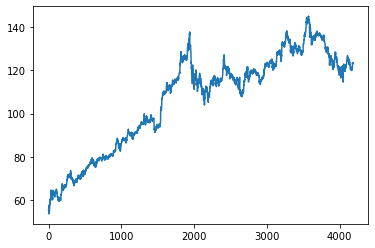

In [140]:
data['close'].plot()


In [141]:
data

,open,high,low,close,Adj Close,volume
0,56.220000,56.220000,55.500000,55.600000,55.600000,0
1,55.550000,56.095000,55.370000,55.700000,55.700000,0
2,56.032500,56.437500,55.937500,56.247500,56.247500,0
3,56.132500,56.750000,56.042500,56.595000,56.595000,0
4,56.550000,58.197500,55.625000,57.812500,57.812500,0
...,...,...,...,...,...,...
4178,123.425003,123.769997,123.040001,123.091103,123.091103,12373575
4179,123.090103,123.720001,123.080002,123.542000,123.542000,9430925
4180,123.544998,123.870003,123.275002,123.345001,123.345001,11354023
4181,123.339996,123.599998,123.019997,123.370003,123.370003,10684835


In [142]:
data.columns

Index(['open', 'high', 'low', 'close', 'Adj Close', 'volume'], dtype='object')

In [143]:
def create_class_column(row):
    if row['close_shift']-row['close'] > 1.5:
        return 1
    if row['close_shift'] -row['close']< -1.5:
        return -1
    else:
        return 0

In [144]:
data['close_shift'] = data.shift(-WINDOW)['close']
data

,open,high,low,close,Adj Close,volume,close_shift
0,56.220000,56.220000,55.500000,55.600000,55.600000,0,56.8750
1,55.550000,56.095000,55.370000,55.700000,55.700000,0,58.4475
2,56.032500,56.437500,55.937500,56.247500,56.247500,0,58.5500
3,56.132500,56.750000,56.042500,56.595000,56.595000,0,59.2225
4,56.550000,58.197500,55.625000,57.812500,57.812500,0,58.3075
...,...,...,...,...,...,...,...
4178,123.425003,123.769997,123.040001,123.091103,123.091103,12373575,NaN
4179,123.090103,123.720001,123.080002,123.542000,123.542000,9430925,NaN
4180,123.544998,123.870003,123.275002,123.345001,123.345001,11354023,NaN
4181,123.339996,123.599998,123.019997,123.370003,123.370003,10684835,NaN


In [145]:
data['class_column'] = data.apply(create_class_column, axis=1)
data

,open,high,low,close,Adj Close,volume,close_shift,class_column
0,56.220000,56.220000,55.500000,55.600000,55.600000,0,56.8750,0
1,55.550000,56.095000,55.370000,55.700000,55.700000,0,58.4475,1
2,56.032500,56.437500,55.937500,56.247500,56.247500,0,58.5500,1
3,56.132500,56.750000,56.042500,56.595000,56.595000,0,59.2225,1
4,56.550000,58.197500,55.625000,57.812500,57.812500,0,58.3075,0
...,...,...,...,...,...,...,...,...
4178,123.425003,123.769997,123.040001,123.091103,123.091103,12373575,NaN,0
4179,123.090103,123.720001,123.080002,123.542000,123.542000,9430925,NaN,0
4180,123.544998,123.870003,123.275002,123.345001,123.345001,11354023,NaN,0
4181,123.339996,123.599998,123.019997,123.370003,123.370003,10684835,NaN,0


In [146]:
# Class divide
data['class_column'].value_counts()

 0    2289
 1    1105
-1     789
Name: class_column, dtype: int64

In [147]:
del (data['close'])
del (data['close_shift'])
data = data.dropna()

In [148]:
data['class_column'].value_counts()


 0    2289
 1    1105
-1     789
Name: class_column, dtype: int64

In [149]:
def train_model(model,train_x, train_y):
    model.fit(train_x, train_y)

def init_classifiers():
    classifiers['DecisionTreeClassifier 1'] = DecisionTreeClassifier(max_depth=10, random_state=0,criterion='gini',splitter='best')
    classifiers['DecisionTreeClassifier 2'] = DecisionTreeClassifier(max_depth=10, random_state=0,criterion='gini',splitter='random')
    classifiers['DecisionTreeClassifier 3'] = DecisionTreeClassifier(max_depth=10, random_state=0,criterion='entropy',splitter='best')
    classifiers['RandomForestClassifier 4'] = RandomForestClassifier(n_estimators=1000, max_depth=3, random_state=0,criterion='gini', n_jobs = -1)
    classifiers['RandomForestClassifier 5'] = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0,criterion='entropy', n_jobs = -1)
    classifiers['GradientBoostingClassifier 1'] = GradientBoostingClassifier(n_estimators=100,random_state=0,criterion='friedman_mse',max_depth=3, learning_rate=0.1)
    classifiers['GradientBoostingClassifier 2'] = GradientBoostingClassifier(n_estimators=1000,random_state=0,criterion='friedman_mse',max_depth=3, learning_rate=0.1)

In [150]:

features = [x for x in data.columns if x not in ['class_column']]
num_step = 250 #  (len(data) / num_train  =  number of train-test sets
len_set = 500 # Length of each train-test set

score = defaultdict(list)
step_headers = []
i = 0

while True:
    df = data.iloc[i * num_step : (i * num_step) + len_set]
    print("step: ", i * num_step, (i * num_step) + len_set)
    print(df['class_column'].value_counts())
    if len(df) < len_set:
        break


    step_headers.append(f'<{i * num_step, (i * num_step) + len_set}>')
    y = df['class_column']
    x = df[features]
    x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.33, shuffle=False)
    classifiers = dict()
    init_classifiers()
    predictions= dict()
    for k,v in classifiers.items():
        print("Calculate: ", k)
        train_model(v,x_train,y_train)
        predictions[k] = v.predict(x_test)
        score[k].append(accuracy_score(y_test.values, predictions[k]))

    i += 1

step:  0 500
 0    300
 1    140
-1     60
Name: class_column, dtype: int64
Calculate:  DecisionTreeClassifier 1
Calculate:  DecisionTreeClassifier 2
Calculate:  DecisionTreeClassifier 3
Calculate:  RandomForestClassifier 4
Calculate:  RandomForestClassifier 5
Calculate:  GradientBoostingClassifier 1
Calculate:  GradientBoostingClassifier 2
step:  250 750
 0    385
 1     78
-1     37
Name: class_column, dtype: int64
Calculate:  DecisionTreeClassifier 1
Calculate:  DecisionTreeClassifier 2
Calculate:  DecisionTreeClassifier 3
Calculate:  RandomForestClassifier 4
Calculate:  RandomForestClassifier 5
Calculate:  GradientBoostingClassifier 1
Calculate:  GradientBoostingClassifier 2
step:  500 1000
 0    377
 1     93
-1     30
Name: class_column, dtype: int64
Calculate:  DecisionTreeClassifier 1
Calculate:  DecisionTreeClassifier 2
Calculate:  DecisionTreeClassifier 3
Calculate:  RandomForestClassifier 4
Calculate:  RandomForestClassifier 5
Calculate:  GradientBoostingClassifier 1
Calcula

In [151]:
# print(score['DecisionTreeClassifier 1'])
# print(score['DecisionTreeClassifier 2'])

headers = ["Classifier type", "Accuracy"]
score_df = pd.DataFrame(score.items(), columns=headers)
# print(tabulate(score_df, headers, tablefmt="psql"))
headers2 = ["Classifier type",] + step_headers
score_df = pd.DataFrame(score.items(), columns=headers)
accuracy_df = pd.DataFrame(score_df['Accuracy'].tolist(), index= score_df.index, columns=step_headers)
score_df = score_df.drop('Accuracy', 1)
f_out = pd.merge(score_df, accuracy_df, how='left', left_index=True, right_index=True)
f_out['mean'] = f_out.mean(axis=1)
headers2 = headers2 + ['mean']
print(tabulate(f_out,headers2 , tablefmt="psql"))

+----+------------------------------+--------------+----------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+----------+
|    | Classifier type              |   <(0, 500)> |   <(250, 750)> |   <(500, 1000)> |   <(750, 1250)> |   <(1000, 1500)> |   <(1250, 1750)> |   <(1500, 2000)> |   <(1750, 2250)> |   <(2000, 2500)> |   <(2250, 2750)> |   <(2500, 3000)> |   <(2750, 3250)> |   <(3000, 3500)> |   <(3250, 3750)> |   <(3500, 4000)> |     mean |
|----+------------------------------+--------------+----------------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+----------|
|  0 | DecisionTreeCla

In [152]:
filename_to_export = f'../data/results/{symbol}_1_{WINDOW}_n_fold_{num_step}_{len_set}_{ datetime.now().strftime("%d_%m_%Y %H_%M_%S")}_pure.csv'
f_out.to_csv(filename_to_export, index=False)

